In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
from numpy import asarray
import keras

In [ ]:
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
import data_preprocessing

TEST_DATA_SET_SIZE = 1000                                                        #The number lines that we take from the file
BATCH_SIZE = 5                                                                   #The number of batch (how many lines the ML learn in peralla)

LOG_DIRECTORY = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')  #The dirrectoy that we save the log from the ML.

data_preprocessing.normalize_and_transform_input_data()                          #Call the normalize_and_transform_input_data() function from data_preprocessing file to orginaze the data file.

### Load the preprocessed data ###

# Print what a single batch looks like.
def show_data_set_batch(data_set):
  for features, labels in data_set.take(1):
    for feature, values in features.items():
      print("{:9s}: {}".format(feature, values.numpy()))
    print('Labels:   ' + str(labels))

full_data_set = tf.data.experimental.make_csv_dataset(
  data_preprocessing.INPUT_DATA_PATH,
  batch_size = BATCH_SIZE,
  column_names = data_preprocessing.INPUT_DATA_COLUMN_NAMES,
  label_name = 'RainTomorrow',                                                   #The lable we want to predicte.
  select_columns = data_preprocessing.INPUT_DATA_COLUMNS_TO_USE,
  header = True,
  num_epochs = 1,
  shuffle = True,
  shuffle_buffer_size = 100000000,
  ignore_errors = False
)

                                                                                 
test_data_set = full_data_set.take(TEST_DATA_SET_SIZE)                           # Split the full data set up into two, one for training and one for testing.
train_data_set = full_data_set.skip(TEST_DATA_SET_SIZE)

                                                                                 
example_batch = next(iter(train_data_set))[0]                                    # Get a batch so we can look at some example values.

feature_columns = []

# Take a look at the example batch.
print('\nExample batch:')
ex_batch = show_data_set_batch(train_data_set)

### Build the feature columns for the input layer ###

# Helper function to take a feature column and pass the example batch through it, in order to test preprocessing done in the feature column.
def pass_example_batch_through_feature_column(feature_column):
  feature_layer = tf.keras.layers.DenseFeatures(feature_column)
  print('\n\nFeature column result for example batch:')
  print(feature_layer(example_batch).numpy())

# Go through each of the columns in the file, inspecting each one, discarding the ones that we don't want.
# For the ones that look to be possibly related to the label, build a feature column and preprocess as needed.
# (This is very repetitive, I deliberately did it the long way since this is a learning project.)

# Feature: Location. Categorical feature (example values: Sydney, Perth, Newcastle), use one-hot encoding.
location_feature_column = feature_column.indicator_column(feature_column.categorical_column_with_vocabulary_list('Location', data_preprocessing.LOCATION_COLUMN_CATEGORIES))
feature_columns.append(location_feature_column)

# Feature: MinTemp. Numeric, pre-scaled.
min_temp_feature_column = feature_column.numeric_column('MinTemp')               #Represents real valued or numerical features.
feature_columns.append(min_temp_feature_column)

# Feature: MaxTemp. Numeric, pre-scaled.
max_temp_feature_column = feature_column.numeric_column('MaxTemp')
feature_columns.append(max_temp_feature_column)

# Feature: Rainfall. Numeric, pre-scaled.
rainfall_feature_column = feature_column.numeric_column('Rainfall')
feature_columns.append(rainfall_feature_column)

# Feature: Evaporation. Numeric, pre-scaled.
evaporation_feature_column = feature_column.numeric_column('Evaporation')
feature_columns.append(evaporation_feature_column)

# Feature: Sunshine. Numeric, pre-scaled.
sunshine_feature_column = feature_column.numeric_column('Sunshine')
feature_columns.append(sunshine_feature_column)

# Feature: WindGustDir. Categorical feature (example values: E, SW, WNW), use one-hot encoding.
wind_gust_dir_feature_column = feature_column.indicator_column(feature_column.categorical_column_with_vocabulary_list('WindGustDir', data_preprocessing.DIRECTION_COLUMN_CATEGORIES))
feature_columns.append(wind_gust_dir_feature_column)

# Feature: WindGustSpeed. Numeric, pre-scaled.
wind_gust_speed_feature_column = feature_column.numeric_column('WindGustSpeed')
feature_columns.append(wind_gust_speed_feature_column)

# Feature: WindDir9am. Categorical feature (example values: SE, NNW, WSW), use one-hot encoding.
wind_dir_9am_feature_column = feature_column.indicator_column(feature_column.categorical_column_with_vocabulary_list('WindDir9am', data_preprocessing.DIRECTION_COLUMN_CATEGORIES))
feature_columns.append(wind_dir_9am_feature_column)

# Feature: WindDir3pm. Categorical feature (example values: NW, WSW, W), use one-hot encoding.
wind_dir_3pm_feature_column = feature_column.indicator_column(feature_column.categorical_column_with_vocabulary_list('WindDir3pm', data_preprocessing.DIRECTION_COLUMN_CATEGORIES))
feature_columns.append(wind_dir_3pm_feature_column)

# Feature: WindSpeed9am. Numeric, pre-scaled.
wind_speed_9am_feature_column = feature_column.numeric_column('WindSpeed9am')
feature_columns.append(wind_speed_9am_feature_column)

# Feature: WindSpeed3pm. Numeric, pre-scaled.
wind_speed_3pm_feature_column = feature_column.numeric_column('WindSpeed3pm')
feature_columns.append(wind_speed_3pm_feature_column)

# Feature: Humidity9am. Numeric, pre-scaled.
humidity_9am_feature_column = feature_column.numeric_column('Humidity9am')
feature_columns.append(humidity_9am_feature_column)

# Feature: Humidity3pm. Numeric, pre-scaled.
humidity_3pm_feature_column = feature_column.numeric_column('Humidity3pm')
feature_columns.append(humidity_3pm_feature_column)

# Feature: Pressure9am. Numeric, pre-scaled.
pressure_9am_feature_column = feature_column.numeric_column('Pressure9am')
feature_columns.append(pressure_9am_feature_column)

# Feature: Pressure3pm. Numeric, pre-scaled.
pressure_3pm_feature_column = feature_column.numeric_column('Pressure3pm')
feature_columns.append(pressure_3pm_feature_column)

# Feature: Cloud9am. Numeric, pre-scaled.
cloud_9am_feature_column = feature_column.numeric_column('Cloud9am')
feature_columns.append(cloud_9am_feature_column)

# Feature: Cloud3pm. Numeric, pre-scaled.
cloud_3pm_feature_column = feature_column.numeric_column('Cloud3pm')
feature_columns.append(cloud_3pm_feature_column)

# Feature: Temp9am. Numeric, pre-scaled.
temp_9am_feature_column = feature_column.numeric_column('Temp9am')
feature_columns.append(temp_9am_feature_column)

# Feature: Temp3pm. Numeric, pre-scaled.
temp_3pm_feature_column = feature_column.numeric_column('Temp3pm')
feature_columns.append(temp_3pm_feature_column)

# Feature: RainToday. Boolean feature (values: 0 and 1), treat it as categorical, use one-hot encoding.
# This is just a boolean representation of the "Rainfall" column. Removed since it has no additional effect on model accuracy.
# rain_today_feature_column = feature_column.indicator_column(feature_column.categorical_column_with_vocabulary_list('RainToday', data_preprocessing.BOOLEAN_COLUMN_CATEGORIES))
# feature_columns.append(rain_today_feature_column)

### Define the model ###

model = tf.keras.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns),
  tf.keras.layers.Dense(16, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(                                                                   # default learnig rate is 0.01
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['binary_accuracy']
)

### Train the model ###

print('\nTraining:')

callbacks = model.fit(
  train_data_set,
  epochs = 6,
  callbacks = [tf.keras.callbacks.TensorBoard(log_dir = LOG_DIRECTORY)]
)

print('\nModel architecture:')
model.summary()

### Test the model ###

print('\nTesting:')

test_loss, test_accuracy = model.evaluate(
  test_data_set,
  verbose = 1
)

print('Test run loss: ' + str(test_loss))
print('Test run accuracy: ' + str(test_accuracy))



Example batch:
Location : [b'Nuriootpa' b'MelbourneAirport' b'WaggaWagga' b'Brisbane'
 b'PerthAirport']
MinTemp  : [ 0.005 -1.522 -1.413  0.504 -1.148]
MaxTemp  : [ 1.733 -1.825 -0.62   0.313  0.284]
Rainfall : [-0.304  0.352 -0.304 -0.304 -0.304]
Evaporation: [ 2.299 -1.489 -0.84  -0.407  1.325]
Sunshine : [ 1.294 -2.058  0.895  0.682  0.922]
WindGustDir: [b'WSW' b'S' b'NNW' b'SSE' b'ESE']
WindGustSpeed: [ 0.834  0.534 -1.116 -1.566  0.159]
WindDir9am: [b'NE' b'N' b'E' b'SSW' b'SSE']
WindDir3pm: [b'SW' b'S' b'NNW' b'ESE' b'ESE']
WindSpeed9am: [-0.802 -0.802 -0.561 -1.162 -0.08 ]
WindSpeed3pm: [-0.092 -0.562 -1.033 -1.855  0.025]
Humidity9am: [-2.478  1.465  0.223 -0.965 -0.803]
Humidity3pm: [-1.961  2.099 -0.079 -0.327 -1.416]
Pressure9am: [-1.395 -1.193  2.093  0.588  1.239]
Pressure3pm: [-0.916 -0.829  1.893  0.699  1.223]
Cloud9am : [-0.801  0.986 -1.159 -0.444 -1.516]
Cloud3pm : [ 0.254  1.388 -0.879 -0.879 -1.634]
Temp9am  : [ 1.674 -1.508 -0.853  0.563 -0.518]
Temp3pm  : [ 1.63

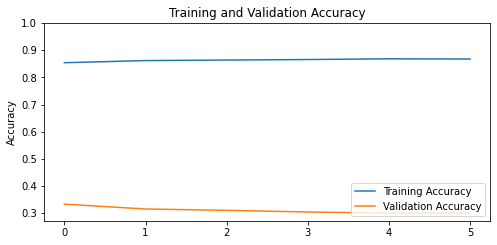

In [ ]:
acc = callbacks.history['binary_accuracy']
val_acc = callbacks.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.show()

In [ ]:
model.save('model.h5') # save model, after the training

In [ ]:
example_batch = next(iter(train_data_set))[0]
example_batch

OrderedDict([('Location', <tf.Tensor: shape=(5,), dtype=string, numpy=
              array([b'Cobar', b'Melbourne', b'AliceSprings', b'SydneyAirport',
                     b'AliceSprings'], dtype=object)>),
             ('MinTemp',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.473, -0.54 ,  0.613, -0.805,  1.33 ], dtype=float32)>),
             ('MaxTemp',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([-0.519, -0.763,  1.633, -1.423,  0.212], dtype=float32)>),
             ('Rainfall',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 1.749, -0.304, -0.304, -0.304,  7.936], dtype=float32)>),
             ('Evaporation',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.134, -0.407,  1.271, -1.002, -0.894], dtype=float32)>),
             ('Sunshine',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([-2.058, -0.302,  0.975,  0.576, -2.058], dtype=float32)>),
             ('WindGustDir',
        

In [ ]:
pred = model.predict(example_batch)
print(pred)

[[0.638]
 [0.193]
 [0.008]
 [0.023]
 [0.91 ]]


In [ ]:
predictions = tf.nn.sigmoid(pred)
#print('Predictions:\n', predictions)

for x in predictions:
  if x < 0.51:
    print('Good for you!!!  it is a day without rain  :)')
  else:
     print('Rainy Day :(')


Rainy Day :(
Rainy Day :(
Good for you!!!  it is a day without rain  :)
Good for you!!!  it is a day without rain  :)
Rainy Day :(


In [ ]:
example_batch = next(iter(test_data_set))[0]
example_batch

OrderedDict([('Location', <tf.Tensor: shape=(5,), dtype=string, numpy=
              array([b'SydneyAirport', b'Sydney', b'SydneyAirport', b'NorfolkIsland',
                     b'Nuriootpa'], dtype=object)>),
             ('MinTemp',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.005, -0.509,  0.613,  0.831, -0.758], dtype=float32)>),
             ('MaxTemp',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.27 , -0.39 ,  0.255,  0.083,  0.413], dtype=float32)>),
             ('Rainfall',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([-0.304, -0.19 , -0.304, -0.19 , -0.304], dtype=float32)>),
             ('Evaporation',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([-0.407,  0.08 ,  0.459, -0.407, -0.082], dtype=float32)>),
             ('Sunshine',
              <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 0.603,  1.241, -0.302,  0.257,  1.56 ], dtype=float32)>),
             ('WindGustDir',
     

In [ ]:
pred = model.predict(example_batch)
print(pred)

[[0.03 ]
 [0.009]
 [0.119]
 [0.155]
 [0.002]]


In [ ]:
predictions = tf.nn.sigmoid(pred)
#print('Predictions:\n', predictions)

for x in predictions:
  if x < 0.51:
    print('Good for you!!!  it is a day without rain  :)')
  else:
     print('Rainy Day :(')

Good for you!!!  it is a day without rain  :)
Good for you!!!  it is a day without rain  :)
Rainy Day :(
Rainy Day :(
Good for you!!!  it is a day without rain  :)


##Second method - sklearn##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('raw_data.csv')
data.shape

(10533, 24)

In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10533 non-null  object 
 1   Location       10533 non-null  object 
 2   MinTemp        10510 non-null  float64
 3   MaxTemp        10526 non-null  float64
 4   Rainfall       10450 non-null  float64
 5   Evaporation    4213 non-null   float64
 6   Sunshine       1948 non-null   float64
 7   WindGustDir    10432 non-null  object 
 8   WindGustSpeed  10432 non-null  float64
 9   WindDir9am     9560 non-null   object 
 10  WindDir3pm     10410 non-null  object 
 11  WindSpeed9am   10489 non-null  float64
 12  WindSpeed3pm   10488 non-null  float64
 13  Humidity9am    10382 non-null  float64
 14  Humidity3pm    10374 non-null  float64
 15  Pressure9am    10356 non-null  float64
 16  Pressure3pm    10349 non-null  float64
 17  Cloud9am       5497 non-null   float64
 18  Cloud3

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


The type of machine learning we will be doing is called classification, because when we make predictions we are classifying each day as rainy or not. More specifically, we are performing binary classification, which means that there are only two different states we are classifying.

Null values
Let's get rid of columns with significant amount of null values. And in the rest columns we will drop rows with null values.

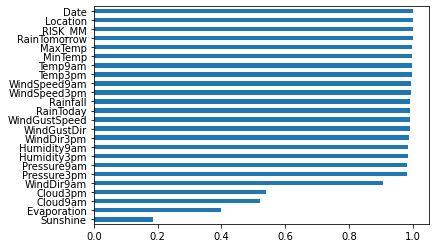

In [ ]:
data_null_percent = pd.Series(index=data.columns)

for column_name in data:
    data_null_percent[column_name] = data[column_name].count()/data.shape[0]
    
data_null_percent_sorted = data_null_percent.sort_values()
data_null_percent_sorted.plot.barh()

Cloud9pm, Cloud3pm, Evaporation, and Sunshine must be droped since significant amount of records in these columns is missed. Also we should exclude RISK_MM because it can leak the answers to the model and reduce its predictability.

In [ ]:
data = data.drop(columns=['Cloud9am','Cloud3pm', 'Evaporation', 'Sunshine','RISK_MM'])

Let's drop rows with null values in them.

In [ ]:
data = data.dropna()
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [ ]:
data.shape
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Split into train and test¶
We must be aware of one important thing: any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
print("train: " + str(train.shape) + ", test: " + str(test.shape))

train: (7272, 19), test: (1818, 19)


Deal with categorical variables¶
To apply such algorithms as Logistic Regression we need to convert the non-numeric data into numeric data. Categorical variables with only 2 possible values can be converted into variables with 0s and 1s as values. For categorical variables with 3 and more possible value we will create dummy variables.

Convert values in columns "RainToday" and "RainTomorrow" from "No" and "Yes" to 0 and 1.

In [ ]:
train["RainToday"] = train["RainToday"].map({"No":0, "Yes":1})
train["RainTomorrow"] = train["RainTomorrow"].map({"No":0, "Yes":1})

test["RainToday"] = test["RainToday"].map({"No":0, "Yes":1})
test["RainTomorrow"] = test["RainTomorrow"].map({"No":0, "Yes":1})

Visualization of how categorical variables impact on forming tomorrow's rain

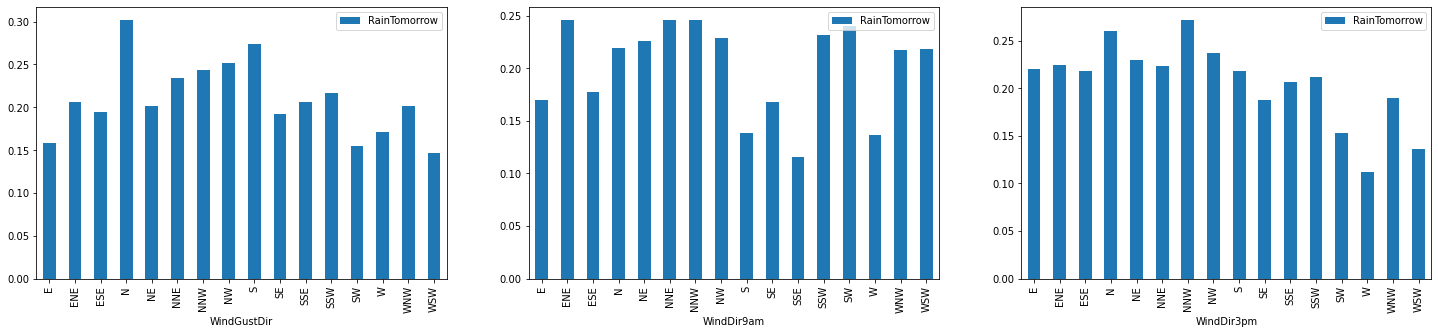

In [ ]:
def category_impact_plot(variable, subplot_position):
    plt.subplot(subplot_position)
    pd.pivot_table(train, index=variable, values='RainTomorrow').plot.bar(figsize=(25,5), ax=plt.gca()) 
   
plt.figure(1)
category_impact_plot("WindGustDir", 131)
category_impact_plot("WindDir9am", 132)
category_impact_plot("WindDir3pm", 133)

Create dummy variables for WindGustDir, WindDir9am, WindDir3pm

In [ ]:
categorical_variables = ["WindGustDir", "WindDir9am", "WindDir3pm"]

train = pd.get_dummies(train, columns=categorical_variables)
test = pd.get_dummies(test, columns=categorical_variables)


In [ ]:
train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
3540,2010-07-17,BadgerysCreek,1.3,17.5,0.0,22.0,9.0,13.0,83.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4892,2014-07-18,BadgerysCreek,3.3,14.8,0.6,52.0,19.0,33.0,53.0,41.0,...,0,0,0,0,0,0,0,0,0,1
3926,2011-09-12,BadgerysCreek,6.1,19.1,0.0,33.0,19.0,6.0,48.0,33.0,...,0,0,0,0,0,0,0,0,0,0
6604,2010-10-29,Cobar,15.0,32.2,0.0,35.0,19.0,13.0,68.0,27.0,...,1,0,0,0,0,0,0,0,0,0
6492,2010-07-09,Cobar,5.5,17.8,0.0,31.0,15.0,17.0,80.0,42.0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, '')

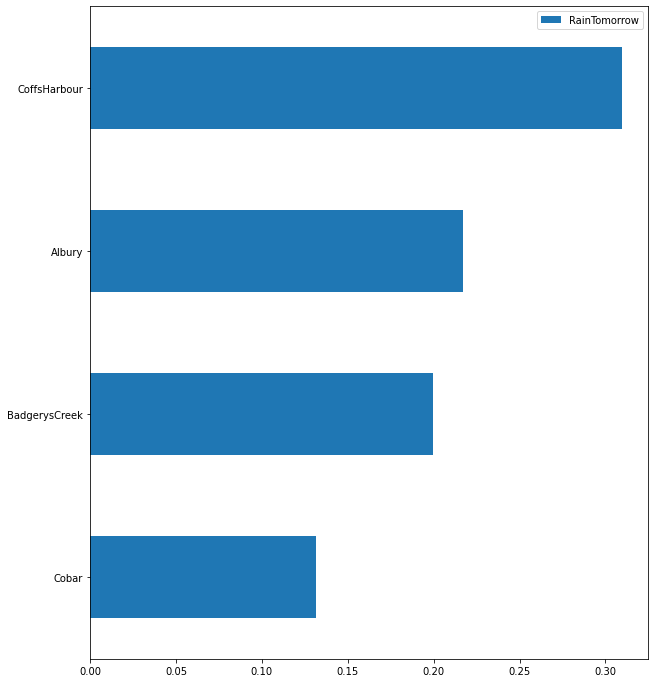

In [ ]:
location_pivot = train.pivot_table(index="Location", values="RainTomorrow")
location_pivot_sorted = location_pivot.sort_values(by=["RainTomorrow"])

location_pivot_sorted.plot.barh(figsize=(10,12))
plt.ylabel('')

Yes, Location obviously affect the formation of tomorrow's rain! So, we're going to use this variable, and in order to use this categorical variable we have to create dummies.

In [ ]:
train = pd.get_dummies(train, columns=["Location"])
test = pd.get_dummies(test, columns=["Location"])

Does Date affect the formation of rain?

In [ ]:
train["Month"] = pd.to_datetime(train["Date"]).dt.month
test["Month"] = pd.to_datetime(test["Date"]).dt.month

Text(0, 0.5, '')

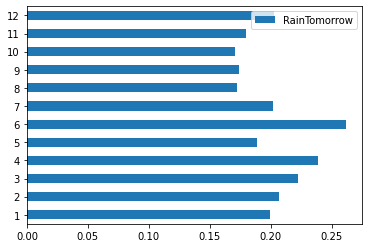

In [ ]:
date_pivot = train.pivot_table(index="Month", values="RainTomorrow")#.sort_index(ascending=False)

date_pivot.plot.barh()
plt.ylabel('')

There's a certain tendency, season 6-8 is a rainy season.

In [ ]:
train = pd.get_dummies(train, columns=["Month"])
test = pd.get_dummies(test, columns=["Month"])

Rescaling,
Looking at our numeric columns, we can see a big difference between the range of each. In order to make sure these values are equally weighted within our model, we'll need to rescale the data.

Rescaling simply stretches or shrinks the data as needed to be on the same scale, in our case between 0 and 1.

In [ ]:
# the preprocessing.minmax_scale() function allows us to quickly and easily rescale our data
from sklearn.preprocessing import minmax_scale

# Added 2 backets to make it a dataframe. Otherwise you will get a type error stating cannot iterate over 0-d array.
def apply_minmax_scale(dataset, features):
    for feature in features:
        dataset[feature] = minmax_scale(dataset[[feature]])
        
numerical_features = ["MinTemp","MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am",
                     "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", 
                     "Pressure3pm", "Temp9am", "Temp3pm"]

apply_minmax_scale(train, numerical_features)
apply_minmax_scale(test, numerical_features)

train[numerical_features].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
3540,0.126154,0.270202,0.000000,0.15,0.152174,0.203704,0.821053,0.444444,0.785425,0.779439,0.211230,0.265625
4892,0.187692,0.202020,0.002878,0.45,0.369565,0.574074,0.505263,0.404040,0.447368,0.551402,0.264706,0.195312
3926,0.273846,0.310606,0.000000,0.26,0.369565,0.074074,0.452632,0.323232,0.680162,0.730841,0.355615,0.315104
6604,0.547692,0.641414,0.000000,0.28,0.369565,0.203704,0.663158,0.262626,0.495951,0.512150,0.481283,0.630208
6492,0.255385,0.277778,0.000000,0.24,0.282609,0.277778,0.789474,0.414141,0.753036,0.764486,0.243316,0.294271


Visualization of how numerical variables impact on forming tomorrow's rain

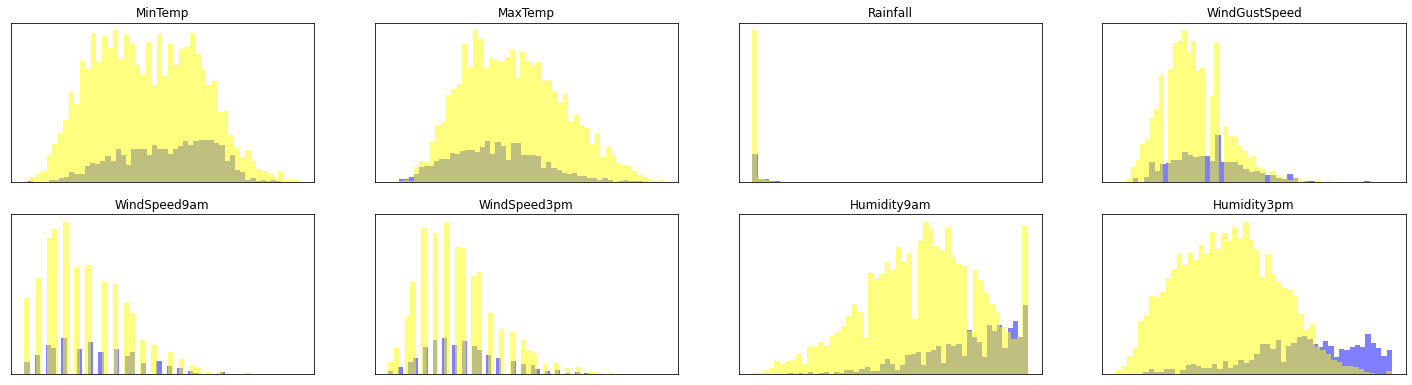

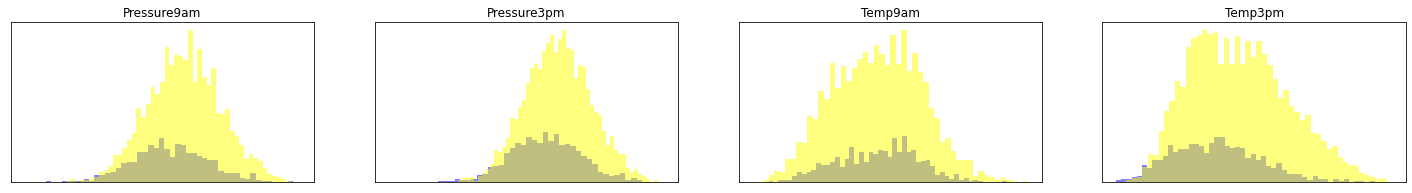

In [ ]:
rainTomorrow_yes = train[train["RainTomorrow"] == 1]
rainTomorrow_no = train[train["RainTomorrow"] == 0]

def variable_impact_plot(variable, subplot_position):
    plt.subplot(subplot_position)
    rainTomorrow_yes[variable].plot.hist(figsize=(25,10), alpha=0.5, color="blue", bins=50, ax=plt.gca())
    rainTomorrow_no[variable].plot.hist(figsize=(25,10), alpha=0.5, color="yellow", bins=50, ax=plt.gca())
    plt.ylabel('')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(variable)

plt.figure(1)
variable_impact_plot("MinTemp", 341)
variable_impact_plot("MaxTemp", 342)
variable_impact_plot("Rainfall", 343)
variable_impact_plot("WindGustSpeed", 344)
variable_impact_plot("WindSpeed9am", 345)
variable_impact_plot("WindSpeed3pm", 346)
variable_impact_plot("Humidity9am", 347)
variable_impact_plot("Humidity3pm", 348)
plt.figure(2)
variable_impact_plot("Pressure9am", 341)
variable_impact_plot("Pressure3pm", 342)
variable_impact_plot("Temp9am", 343)
variable_impact_plot("Temp3pm", 344)

We are intrested in variables with plots where blue and yellow areas have different shapes. Such variables have impact(positive or negative) on forming tomorrow's rain. The most obvious one is Humidity3pm! The rest is not that clear, we will use another feature selection method.

Collinearity¶
We now have 73 possible feature columns we can use to train our model. One thing to be aware of as you start to add more features is a concept called collinearity. Collinearity occurs where more than one feature contains data that are similar.

The effect of collinearity is that your model will overfit - you may get great results on your test data set, but then the model performs worse on unseen data (like the test set).

A common way to spot collinearity is to plot correlations between each pair of variables in a heatmap.

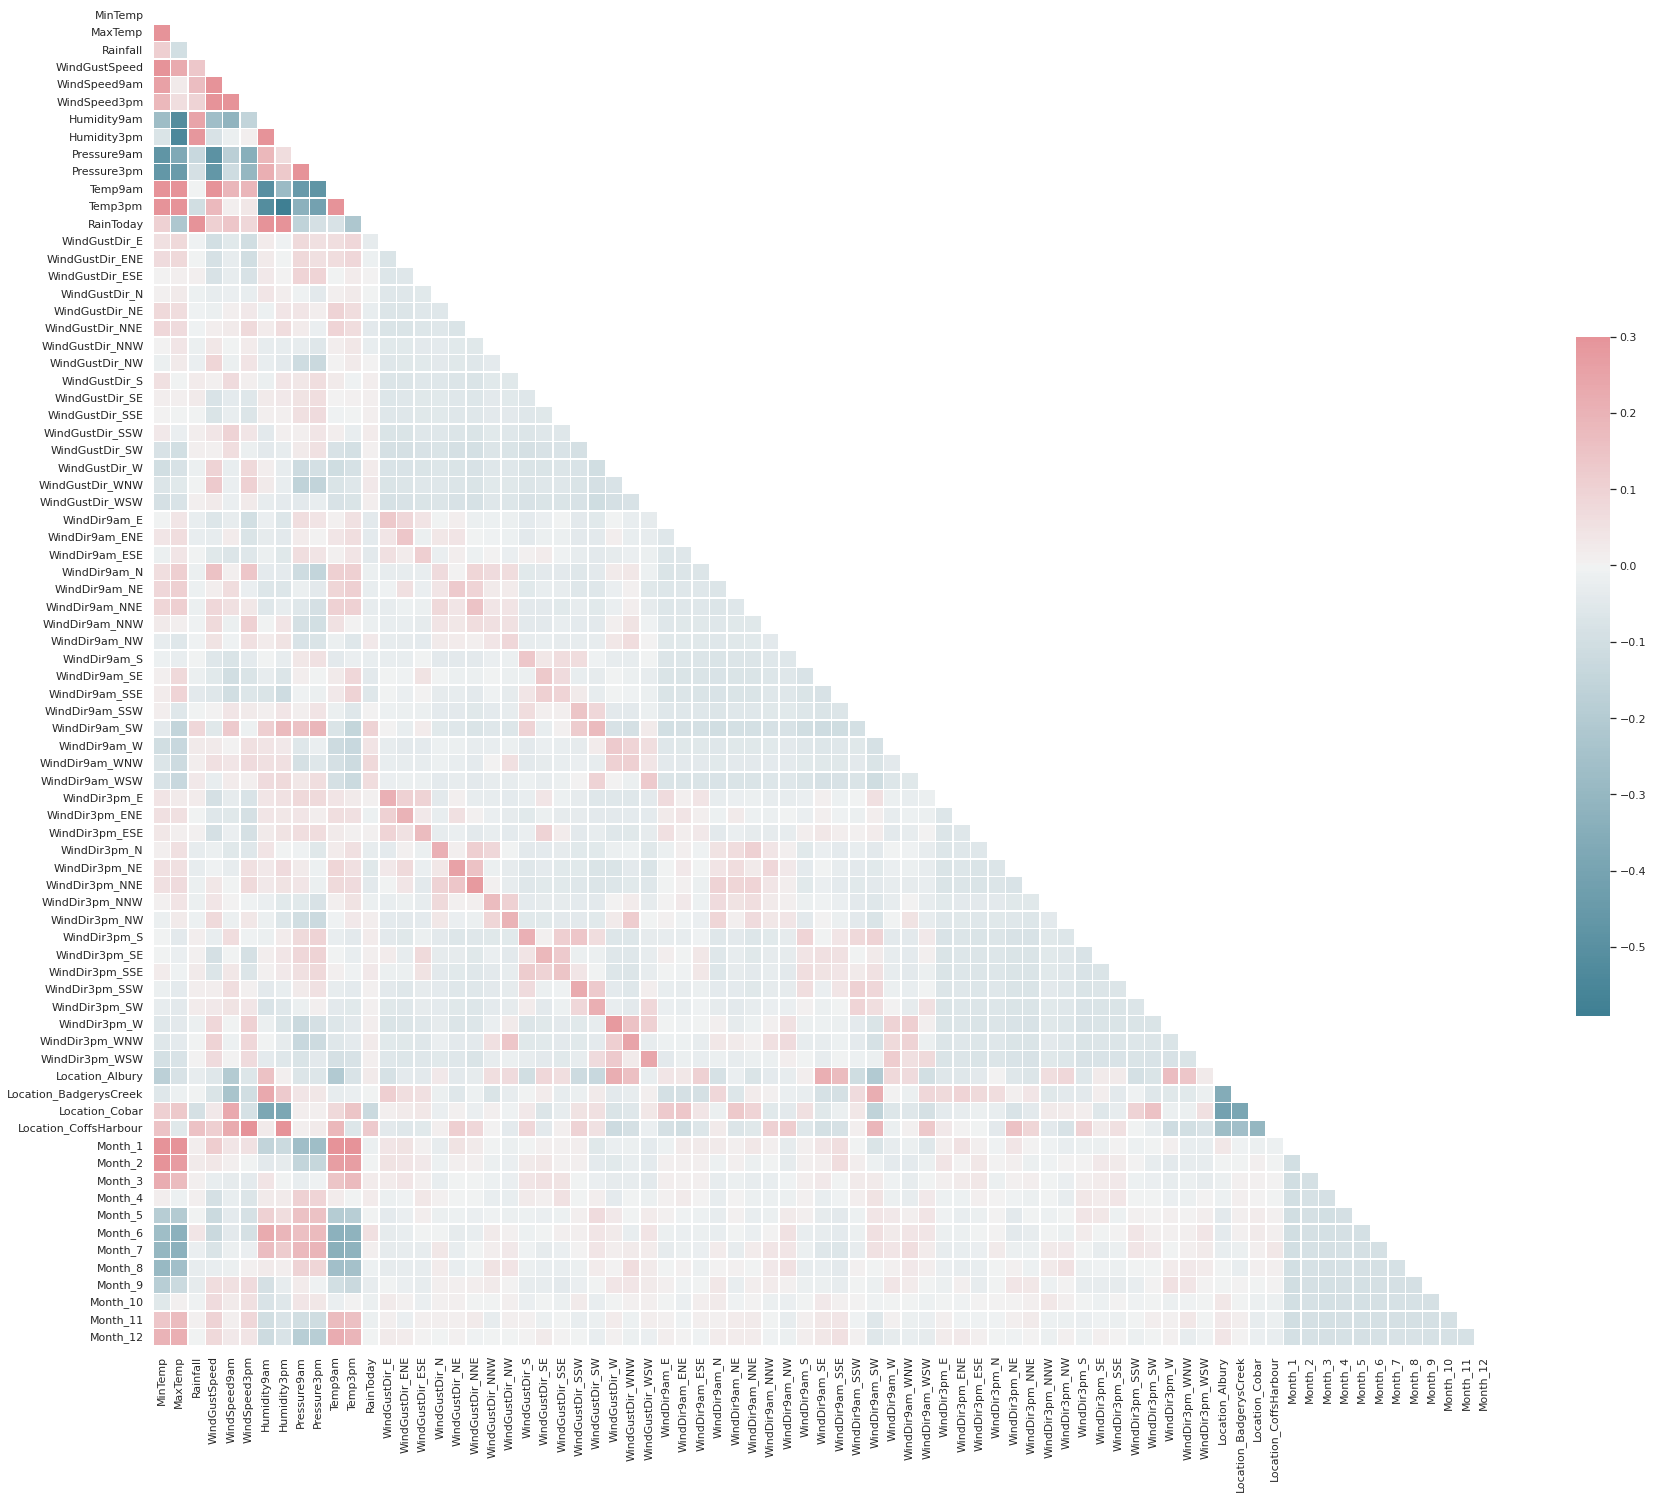

In [ ]:
# columns we will be using all the way down
columns = list(train.columns[1:])
columns.remove("RainTomorrow")
import seaborn as sns

# custom function to set the style for heatmap
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(30, 25))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(train[columns])

We can see that there is correlation about 30-50% between some variables. That's not enough to remove one of them and rely on the other.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

WindGustDir_E
WindDir9am_E
WindDir3pm_E

Feature selection
In order to select the best-performing features, we need a way to measure which of our features are relevant to our outcome - in this case, the impact on forming tomorrow's rain. One effective way is by training a logistic regression model using all of our features, and then looking at the coefficients of each feature.

The scikit-learn LogisticRegression class has an attribute in which coefficients are stored after the model is fit, LogisticRegression.coef_. We first need to train our model, after which we can access this attribute.

In [ ]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(train[columns], train["RainTomorrow"])
coefficients = logisticRegression.coef_
print(coefficients)

[[ 2.36386947 -0.52008405  0.44602224  5.74137531  0.20203813 -1.59506152
   1.19467334  7.13150346  1.27563418 -3.34689927  0.46088097  0.11590591
   0.15048117 -0.09116014  0.04538553  0.11472254  0.41494531 -0.27419812
  -0.25108772  0.08840126  0.32804082  0.37987248 -0.09839103  0.07490415
  -0.10531593 -0.0812343  -0.10635402 -0.22295471 -0.19688342  0.07652965
   0.52764987  0.16672266 -0.13759991  0.26723081  0.01965768 -0.15174107
  -0.19110818 -0.28793805  0.04426693 -0.13965335  0.14929975  0.11355765
  -0.38853685 -0.33780964  0.28816473  0.2014433   0.11782299  0.16615104
   0.2875214   0.10972952 -0.06309185  0.47922173  0.23804173  0.01093331
  -0.05864689 -0.0259853   0.16935032 -0.30033187 -0.61933302 -0.28635553
  -0.40777818  0.44079406 -0.21846575  0.20683726 -0.41047289 -0.26537527
  -0.41244116 -0.13941822  0.39219674  0.1900574   0.17885549  0.11602284
   0.15073389  0.17760728  0.04573547 -0.16839338 -0.24688838]]


The coef() method returns a NumPy array of coefficients, in the same order as the features that were used to fit the model. To make these easier to interpret, we can convert the coefficients to a pandas series, adding the column names as the index:

In [ ]:
feature_importance = pd.Series(coefficients[0], index=columns)
print(feature_importance)

MinTemp          2.363869
MaxTemp         -0.520084
Rainfall         0.446022
WindGustSpeed    5.741375
WindSpeed9am     0.202038
                   ...   
Month_8          0.150734
Month_9          0.177607
Month_10         0.045735
Month_11        -0.168393
Month_12        -0.246888
Length: 77, dtype: float64


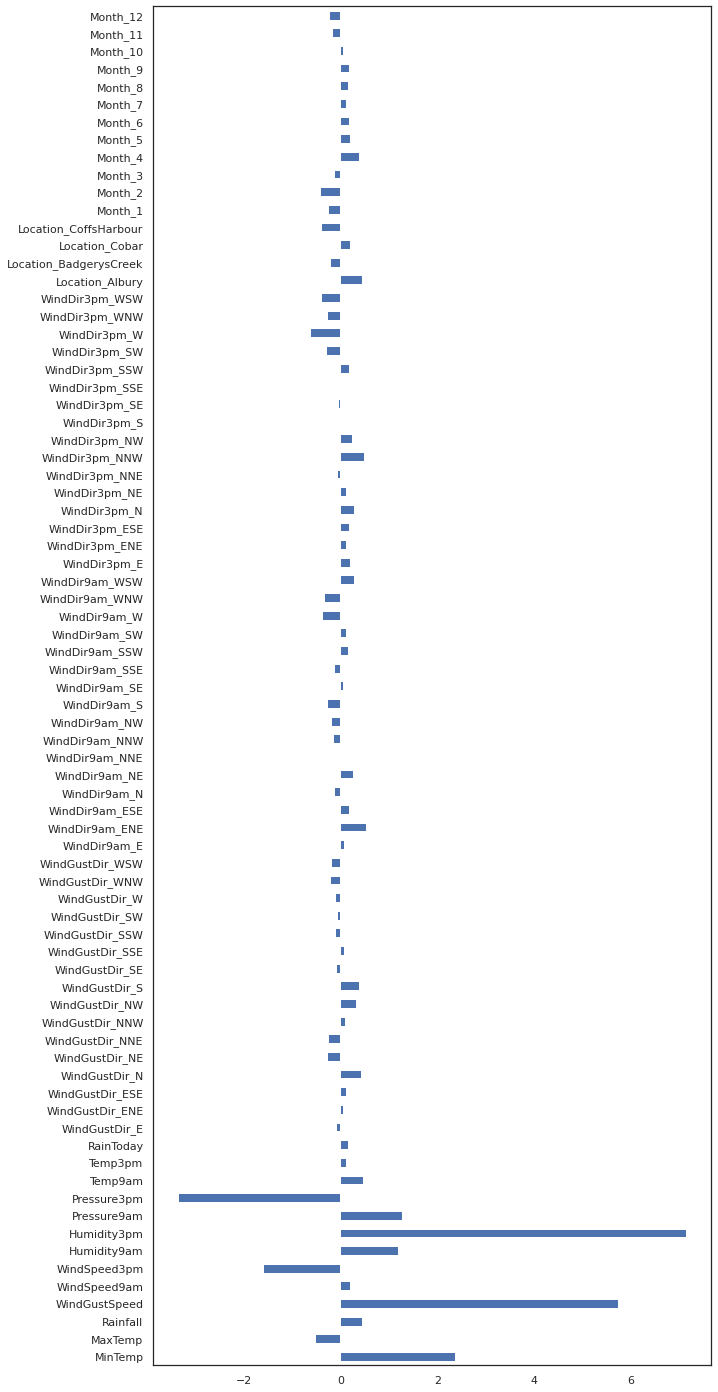

In [ ]:
# Plotting as a horizontal Bar chart
feature_importance.plot.barh(figsize=(10,25))
plt.show()

The plot we generated shows a range of both positive and negative values. Whether the value is positive or negative isn't as important in this case, relative to the magnitude of the value. If you think about it, this makes sense. A feature that indicates strongly whether a it's not going to rain tomorrow is just as useful as a feature that indicates strongly that a it's going to rain tomorrow, given they are mutually exclusive outcomes.

To make things easier to interpret, we'll alter the plot to show all positive values, and have sorted the bars in order of size:

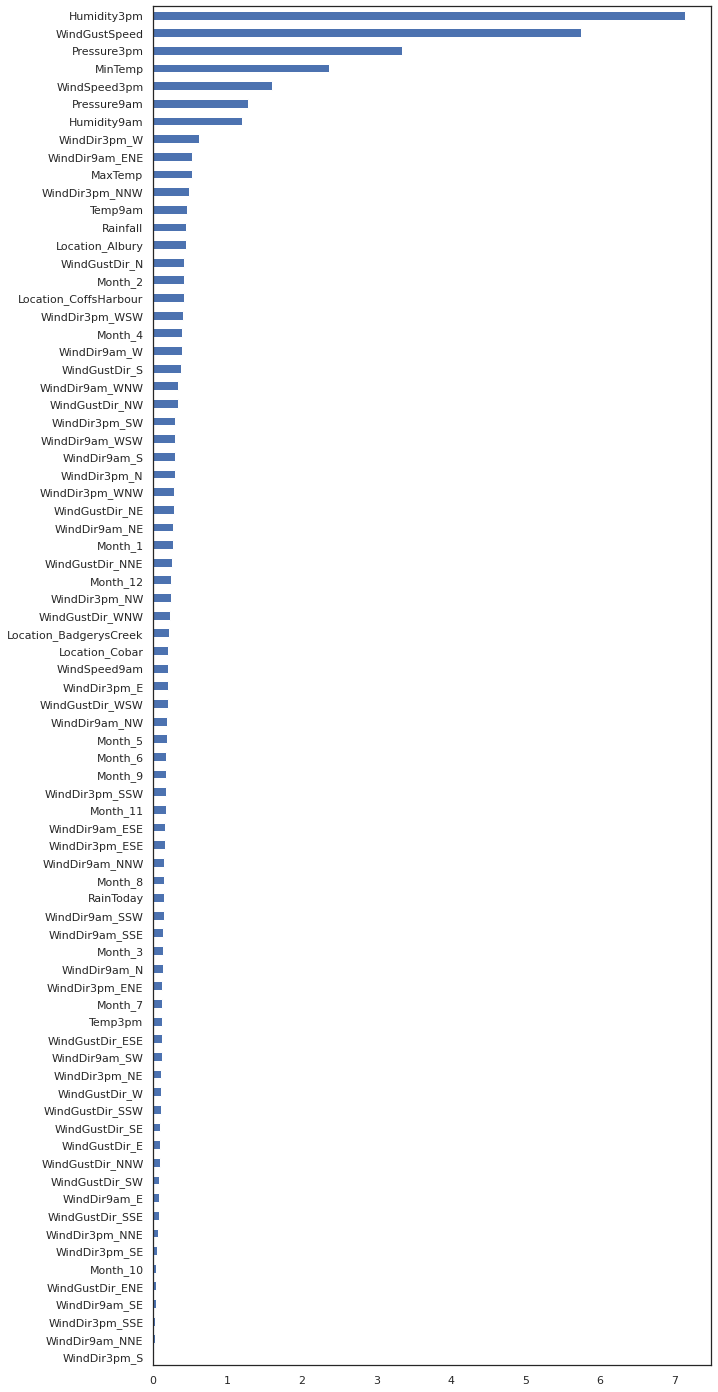

In [ ]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh(figsize=(10,25))
plt.show()

We'll train a model with the top 4 scores.

In [ ]:
predictors = ["Pressure3pm", "WindGustSpeed", "Pressure9am", "Humidity3pm"]

lr = LogisticRegression()
lr.fit(train[predictors], train["RainTomorrow"])
predictions = lr.predict(test[predictors])
print(predictions)

[0 0 0 ... 1 0 1]


In [ ]:
# Calculating the accuracy using the k-fold cross validation method with k=10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, train[predictors], train["RainTomorrow"], cv=10)
print(scores)

[0.87774725 0.86263736 0.86519945 0.85006878 0.86519945 0.869326
 0.86519945 0.85419532 0.86382393 0.85419532]


In [ ]:
# Taking the mean of all the scores
accuracy = scores.mean()
print(accuracy)

0.86275923182732
